<a href="https://colab.research.google.com/github/chakravarthi-kudumula/Optimizing-Bank-Marketing-Campaigns-Using-Regularized-Ensemble-Learning-Techniques/blob/main/Bank_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizing Bank Marketing Campaigns Using Regularized Ensemble Learning Techniques**

This project aims to develop a predictive model to determine whether a bank client will subscribe to a term deposit based on demographic, financial, and campaign-related factors. Using numerical optimization and machine learning techniques, the goal is to identify key drivers influencing client decisions and enhance the effectiveness of future marketing campaigns.


### **Data Overview**

In [ ]:
!pip install statsmodels

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Importing Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Loading the Dataset
df = pd.read_csv('/content/drive/MyDrive/Computational/Term Project/bank-full.csv', sep=';')

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print(df["y"].count())

45211


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Checking for missing or "unknown" values
print("Null values in each column:\n", df.isnull().sum())

# Counting 'unknown' entries manually for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].isin(['unknown']).sum()} 'unknown' values")

Null values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
job: 288 'unknown' values
marital: 0 'unknown' values
education: 1857 'unknown' values
default: 0 'unknown' values
housing: 0 'unknown' values
loan: 0 'unknown' values
contact: 13020 'unknown' values
month: 0 'unknown' values
poutcome: 36959 'unknown' values
y: 0 'unknown' values


In [ ]:
# Checking unique values and their frequencies in 'contact'
df['contact'].value_counts()

,count
contact,
cellular,29285
unknown,13020
telephone,2906



### **Explortory Data Analysis**

**Univariate Analysis**

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


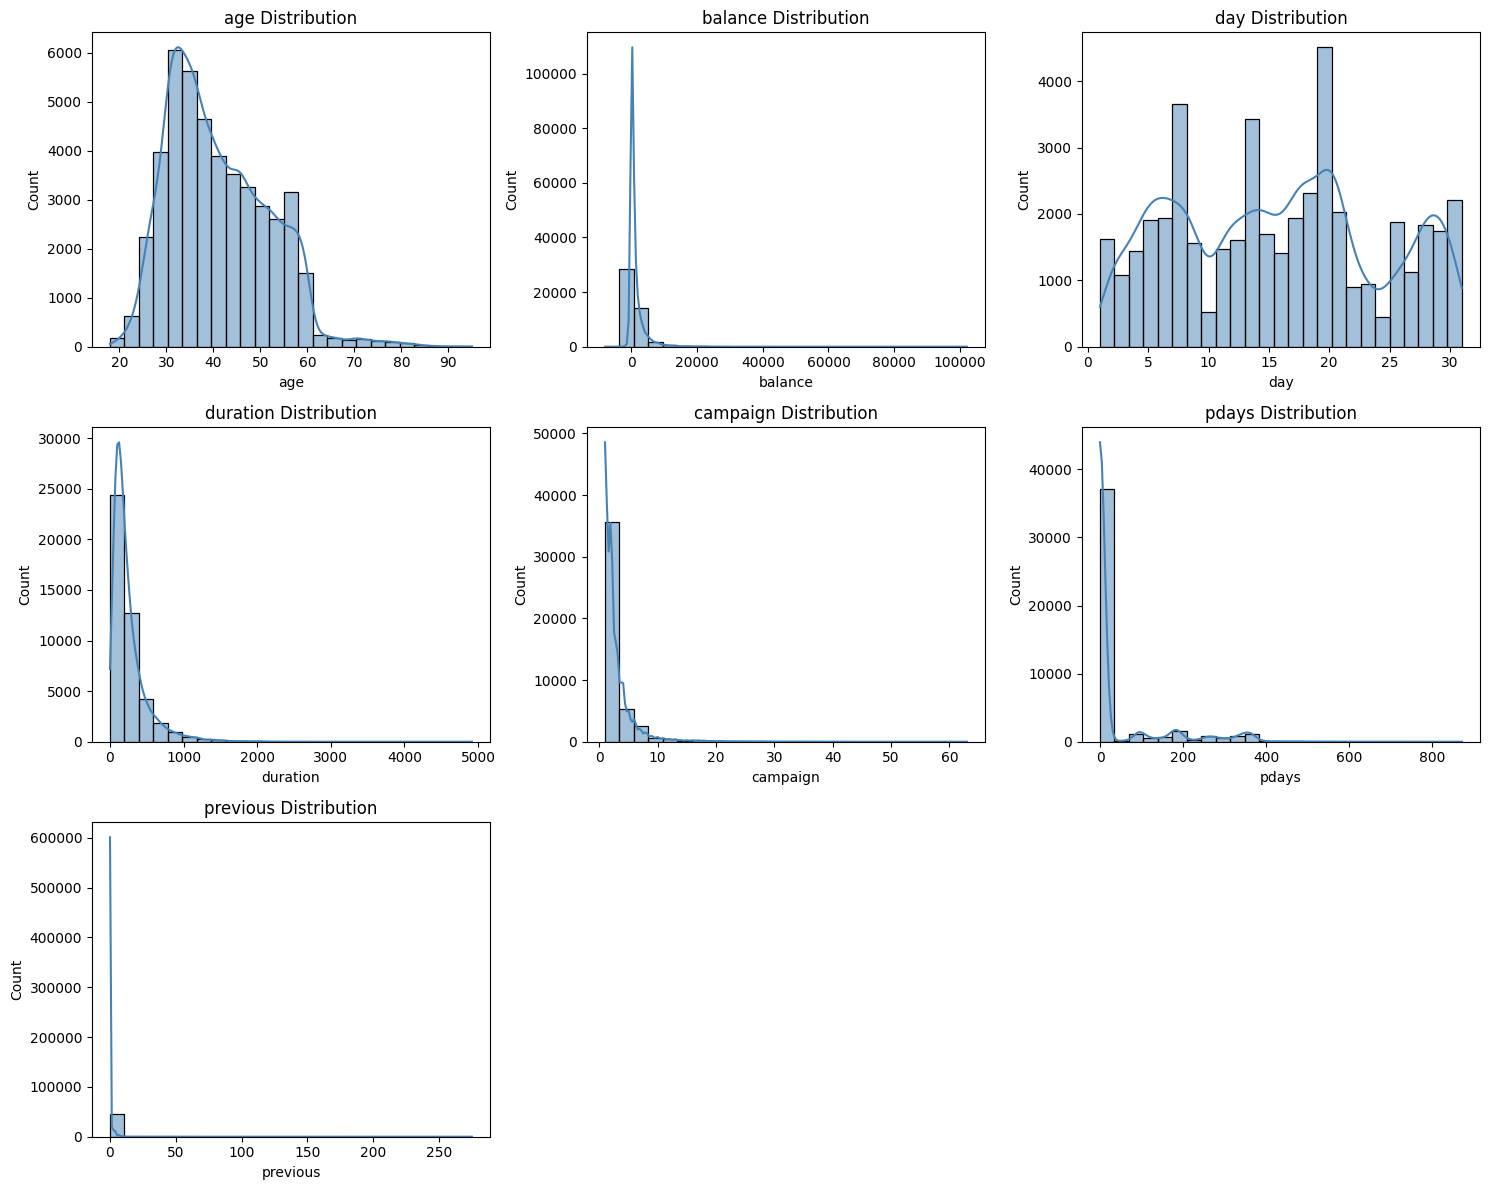

In [ ]:
# Univariate Analysis of all Numeric Variables
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Summary statistics
display(df[num_cols].describe())

# Histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=25, color='steelblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

1. Age :
	* Range: 18 to 95 years | Mean: ≈ 40.9 | Std Dev: ≈ 10.6
	*	Distribution: Slightly right-skewed, with most clients between 25 and 50 years.
	*	Insight: Represents a typical working-age population; no extreme outliers.
	*	Model Implication: No transformation required; standard scaling is sufficient.

2. Balance :
	*	Range: –8,019 € to 102,127 € | Mean: ≈ 1 362 € | Std Dev: ≈ 3,045 €
	*	Distribution: Highly right-skewed with extreme positive outliers.
	*	Insight: Most clients hold modest or near-zero balances; a few possess very large amounts.
	*	Model Implication: Requires log transformation or robust scaling to prevent large magnitudes from dominating gradient-based optimization.

3. Day :
	*	Range: 1 to 31 | Mean: ≈ 15.8
	*	Distribution: Roughly uniform across all days of the month.
	*	Insight: No meaningful monthly pattern—simply the day of contact.
	*	Model Implication: Low predictive value; can remain unscaled.

4. Duration :
	*	Range: 0 to 4918 seconds | Mean: ≈ 258 s | Std Dev: ≈ 257s
	*	Distribution: Strongly right-skewed—many short calls, few long ones.
	*	Insight: Longer calls tend to reflect more engaged clients and correlate with “yes” responses.
	*	Important Note: Since duration is only known after a call is made, it must be excluded from real-time predictive models, but it can be used for exploratory or benchmark analysis.

5. Campaign :
	*	Range: 1 to 63 | Mean: ≈ 2.76
	*	Distribution: Right-skewed—most clients were contacted 1–3 times.
	*	Insight: Repeated contacts often indicate campaign persistence but can also signal client fatigue.
	*	Model Implication: Normalization recommended to stabilize optimization.

6. Pdays :
	*	Range: –1 to 871 | Mean: ≈ 40.2 | Std Dev: ≈ 100.1
	*	Distribution: Highly skewed; the vast majority of entries are –1.
	*	Insight: A value of –1 means “not contacted previously,” indicating that most clients were first-time contacts.
	*	Model Implication: Treat –1 as a separate categorical flag (e.g., previous_contacted = 0/1) rather than as a continuous number.

7. Previous :
	*	Range: 0 to 275 | Mean: ≈ 0.58 | Std Dev: ≈ 2.3
	*	Distribution: Extremely right-skewed; nearly all entries are 0.
	*	Insight: Very few clients were previously contacted multiple times.
	*	Model Implication: Apply transformation such as log(1 + x) or binarize into contacted_before (yes/no) for better numerical stability.

/tmp/ipython-input-168701093.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')
/tmp/ipython-input-168701093.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')
/tmp/ipython-input-168701093.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')
/tmp/ipython-input-168701093.py:10: FutureWarning: 

Passing `palette` without assigning `h

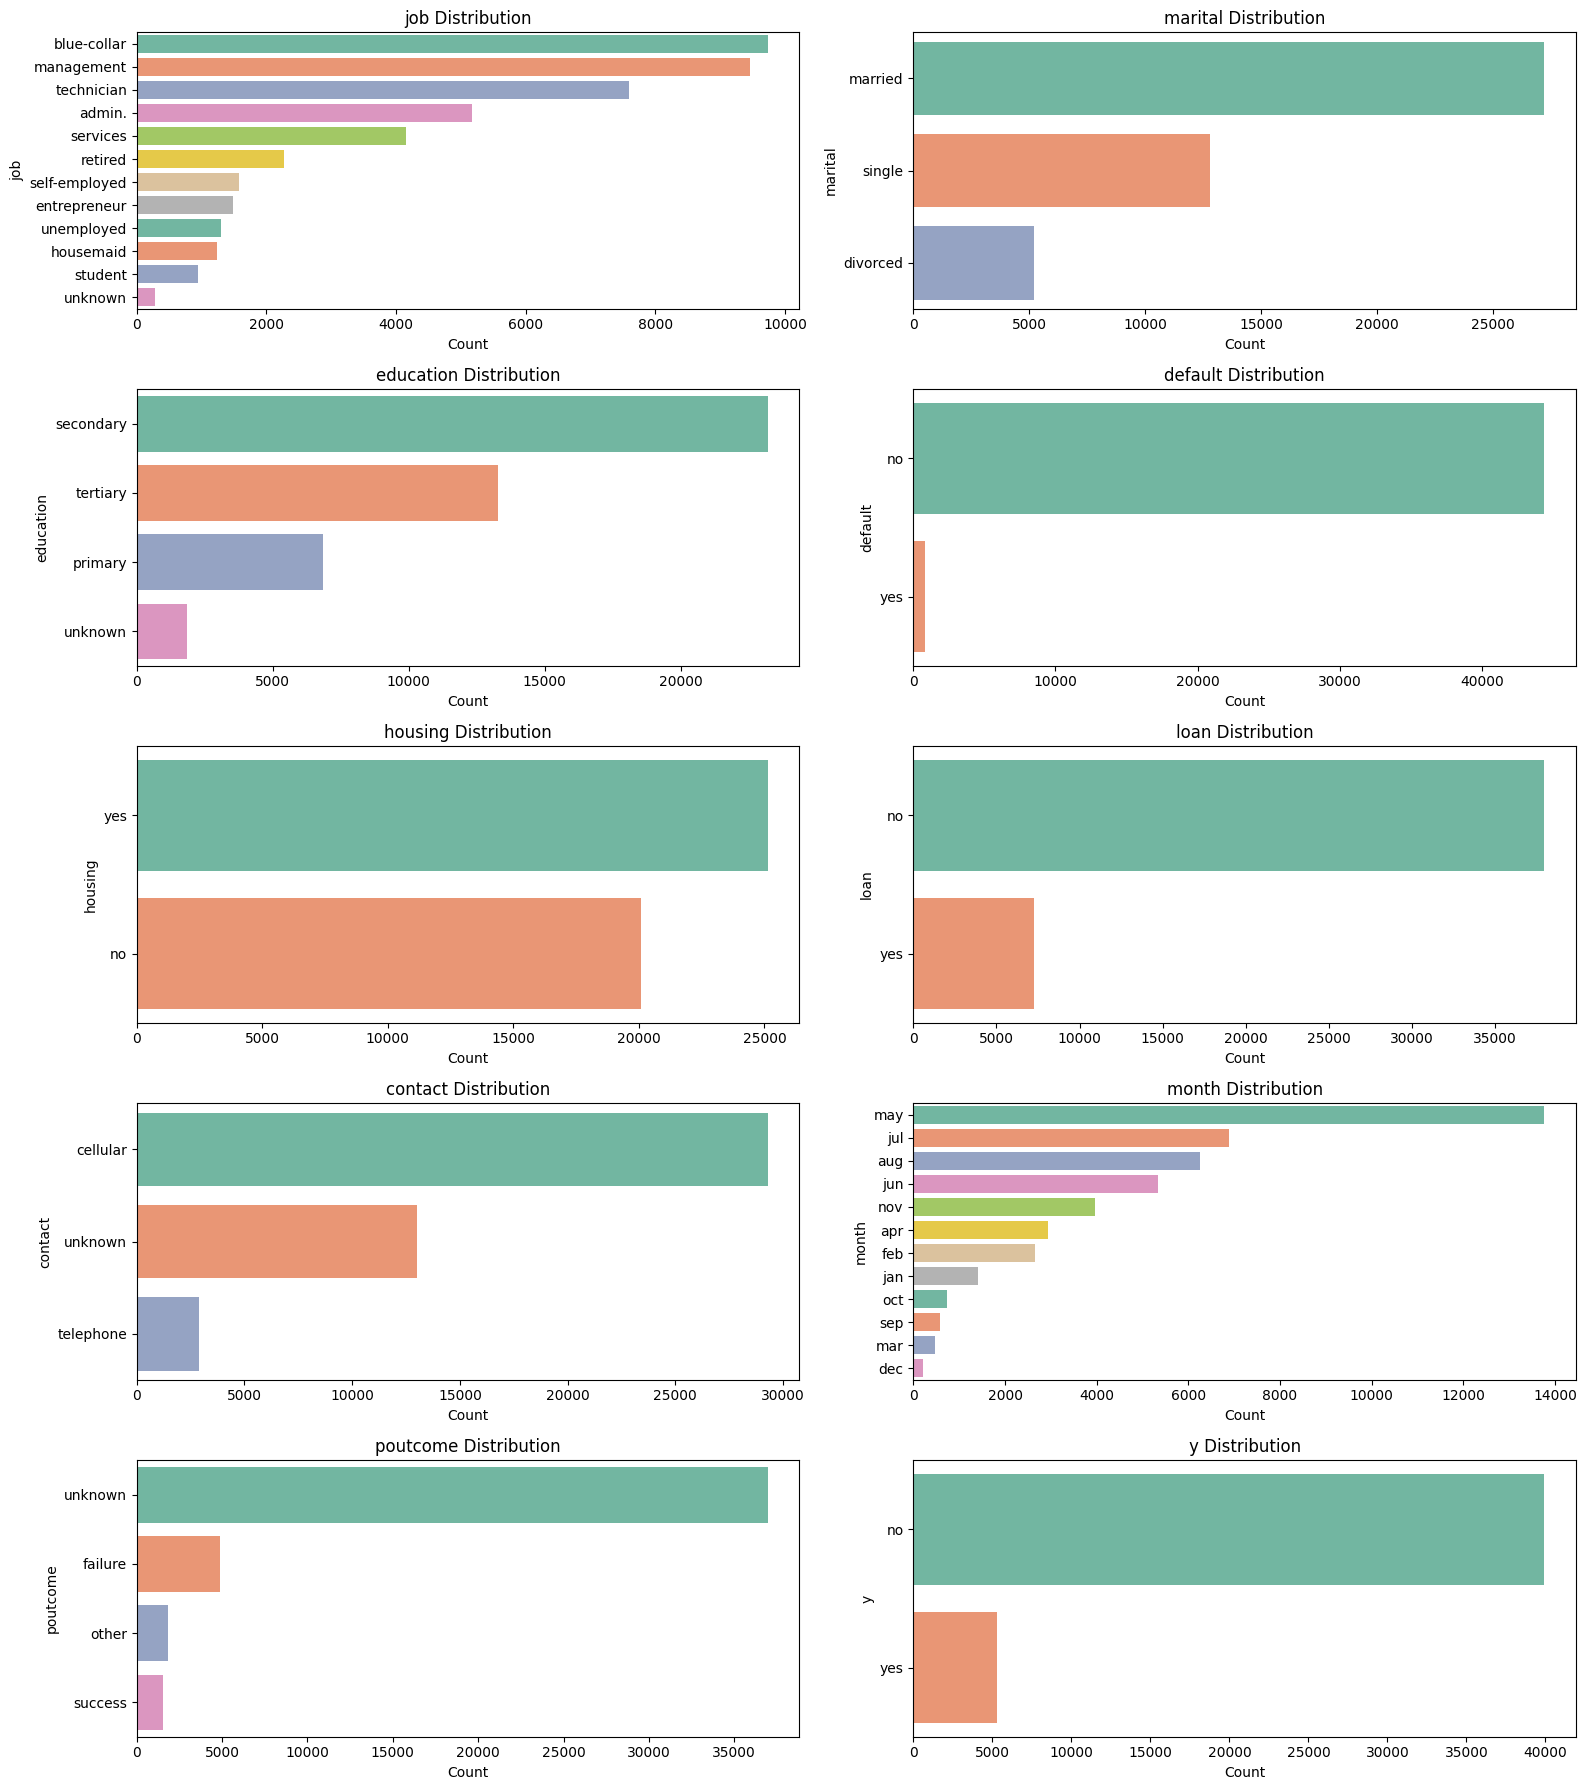


job value counts:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital value counts:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education value counts:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default value counts:
default
no     44396
yes      815
Name: count, dtype: int64

housing value counts:
housing
yes    25130
no     20081
Name: count, dtype: int64

loan value counts:
loan
no     37967
yes     7244
Name: count, dtype: int64

contact value counts:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month value counts:
month
may    13766
jul     6895
aug     6247
jun     5341
nov

In [ ]:
# Univariate Analysis of all categorical columns
# Categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome', 'y']

# Frequency plots
plt.figure(figsize=(16, 18))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Frequency tables
for col in cat_cols:
    print(f"\n{col} value counts:\n{df[col].value_counts()}")

1. Job :
   * Counts : Blue-collar (9732), Management (9458), Technician (7 597), Admin (5171), Services (4154)
   * Fewer clients are Retired (2264), Self-employed (1579), Entrepreneur (1487), Unemployed (1303), Housemaid (1240), Student (938), and Unknown (288).
   * The dataset is dominated by working-class and managerial occupations.
   * “Unknown” is negligible and can be kept as its own category.

2. Marital Status :
   * Counts: Married (27,214), Single (12,790), Divorced (5,207).
   * Majority are married (~60 %), indicating a financially stable client base.

3. Education :
   * Counts: Secondary (23,202), Tertiary (13,301), Primary (6,851), Unknown (1,857).
   * Most clients completed at least secondary education; education may correlate with financial literacy.

4. Default (Credit in Default) :
   * Counts: No (44,396), Yes (815).
   * Extremely imbalanced; few defaults → limited predictive power but still a risk indicator.

5. Housing Loan :
   * Counts: Yes (25,130), No (20,081).
   * About half have housing loans; may reduce available savings for term deposits.

6. Personal Loan :
   * Counts: No (37,967), Yes (7,244).
   * ≈16 % hold a personal loan, showing moderate financial exposure.

7. Contact Type :
   * Counts: Cellular (29,285), Unknown (13,020), Telephone (2,906).
   * Most contacts were cellular; “unknown” indicates no record and will be retained as a meaningful category.

8. Month of Last Contact :
   * Top Months: May (13,766), July (6,895), August (6,247), June (5,341), November (3,970).
   * Least Frequent: December (214).
   * Campaign activity peaks in May; month shows clear seasonality.

9. Outcome of Previous Campaign (poutcome) :
   * Counts: Unknown (36,959), Failure (4,901), Other (1,840), Success (1,511).
   * Most clients were first-time contacts; previous success likely increases subscription probability.

10. Target Variable (y) :
    * Counts: No (39,922), Yes (5,289).
    * Dataset is highly imbalanced (~12 % “yes”). Will require class-balancing or weighted optimization.

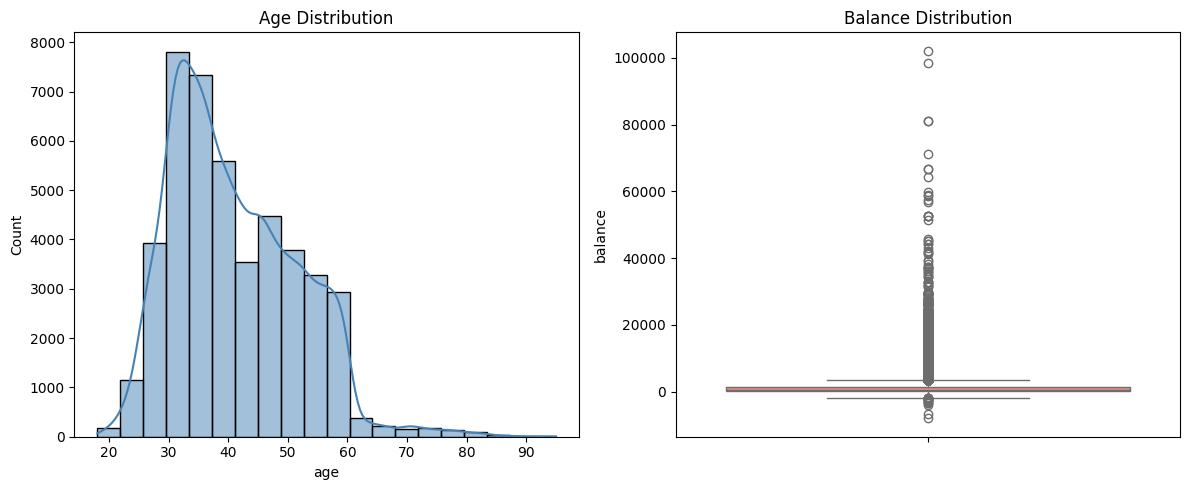

In [ ]:
# Summary statistics for key numeric variables
df[['age', 'balance']].describe()

# Visualizing distributions
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['age'], kde=True, bins=20, color='steelblue')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.boxplot(y=df['balance'], color='salmon')
plt.title('Balance Distribution')

plt.tight_layout()
plt.show()

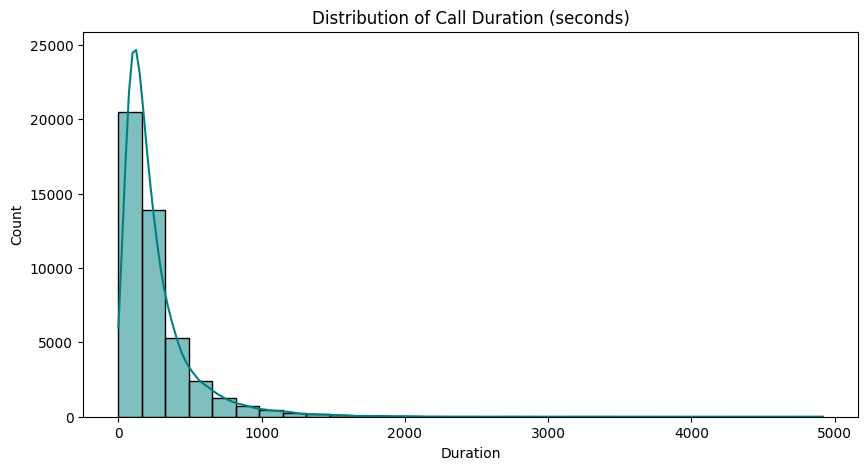

,duration
count,45211.000000
mean,258.163080
std,257.527812
min,0.000000
25%,103.000000
50%,180.000000
75%,319.000000
max,4918.000000


In [ ]:
# Univariate analysis of duration
plt.figure(figsize=(10,5))
sns.histplot(df['duration'], bins=30, kde=True, color='teal')
plt.title('Distribution of Call Duration (seconds)')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

# Summary statistics
df['duration'].describe()

**Target Variable Analysis**

In [ ]:
df['y'].value_counts().to_frame('Count').assign(Percentage=df['y'].value_counts(normalize=True)*100)

,Count,Percentage
y,,
no,39922,88.30152
yes,5289,11.69848


/tmp/ipython-input-3738837799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='pastel')


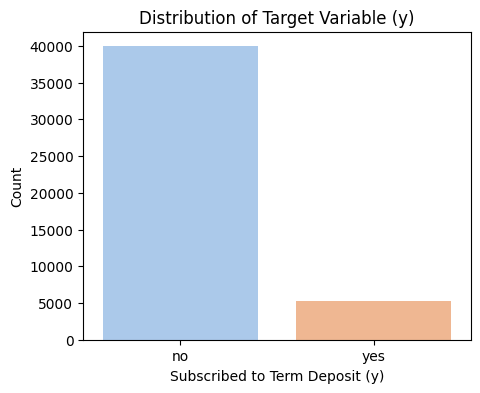

Class Distribution (%):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='y', data=df, palette='pastel')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Count')
plt.show()

# Display class proportions
class_counts = df['y'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(class_counts)

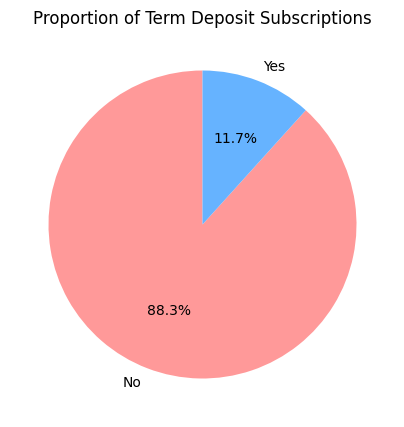

In [ ]:
# Pie Chart
plt.figure(figsize=(5,5))
df['y'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], labels=['No', 'Yes'], startangle=90)
plt.title('Proportion of Term Deposit Subscriptions')
plt.ylabel('')
plt.show()

*	The dataset is highly imbalanced : only about 12 % “yes” responses.
*	This means that if we simply minimize standard loss functions (like least-squares or log-loss) without adjustment, the model could converge to a trivial solution predicting “no” for everyone and still achieve ~88 % accuracy.
*	So, later in optimization, we’ll compensate using:
  *	Weighted loss functions, or
  *	Resampling techniques (SMOTE, stratified sampling).
  * Evaluating models using metrics robust to imbalance (ROC-AUC, precision-recall, F1-score).

In [ ]:
# Calculating Entropy
from scipy.stats import entropy

p = df['y'].value_counts(normalize=True)
target_entropy = entropy(p, base=2)
print(f"Entropy of target variable y: {target_entropy:.3f} bits")

Entropy of target variable y: 0.521 bits


In [ ]:
# Stratified Split Preview

y = df['y']
_, y_test = train_test_split(y, test_size=0.2, stratify=y, random_state=42)
print("Train target distribution:\n", y.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))

Train target distribution:
 y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64
Test target distribution:
 y
no     0.883003
yes    0.116997
Name: proportion, dtype: float64


**Bivariate Analysis**

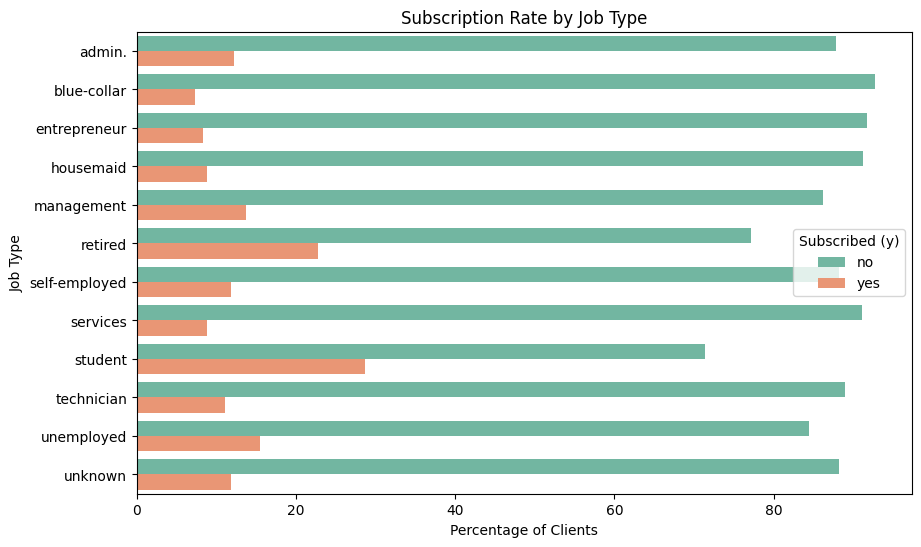

y,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


In [ ]:
# Job vs Target(y)
# Computing job-wise subscription rates
job_success = (
    df.groupby('job')['y']
    .value_counts(normalize=True)
    .rename('proportion')
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(x='proportion', y='job', hue='y', data=job_success, palette='Set2')
plt.title('Subscription Rate by Job Type')
plt.xlabel('Percentage of Clients')
plt.ylabel('Job Type')
plt.legend(title='Subscribed (y)')
plt.show()

# Display detailed table
pd.crosstab(df['job'], df['y'], normalize='index') * 100

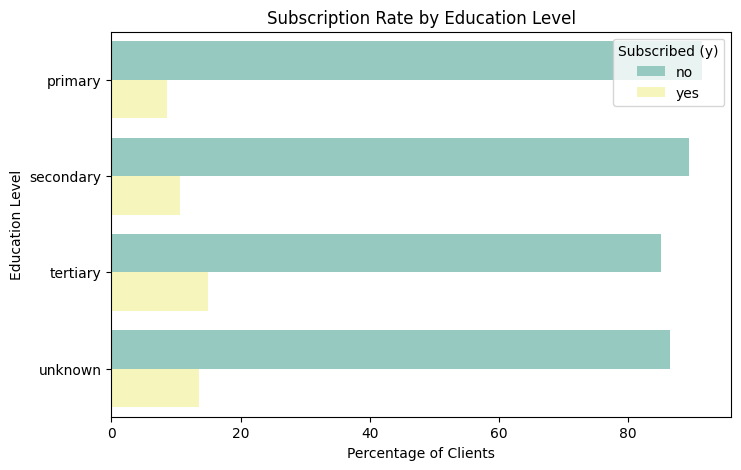

y,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


In [ ]:
# Education vs Target

# Computing subscription rate by education level
edu_success = (
    df.groupby('education')['y']
    .value_counts(normalize=True)
    .rename('proportion')
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(x='proportion', y='education', hue='y', data=edu_success, palette='Set3')
plt.title('Subscription Rate by Education Level')
plt.xlabel('Percentage of Clients')
plt.ylabel('Education Level')
plt.legend(title='Subscribed (y)')
plt.show()

# Numeric table
pd.crosstab(df['education'], df['y'], normalize='index') * 100

This pattern suggests that financial awareness(education) and income stability play a key role in investment decisions.
Hence, education acts as a strong and interpretable predictor, displaying a clear positive relationship with the likelihood of subscription.

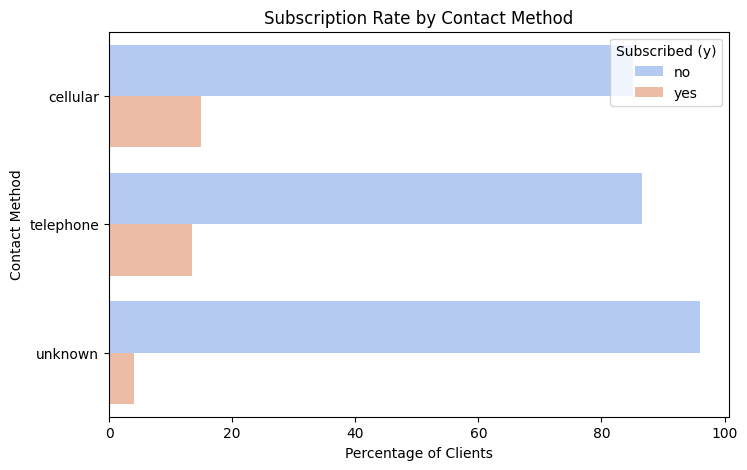

y,no,yes
contact,,
cellular,85.081100,14.918900
telephone,86.579491,13.420509
unknown,95.929339,4.070661


In [ ]:
# Contact vs Target

# Calculating contact method-wise success rates
contact_success = (
    df.groupby('contact')['y']
    .value_counts(normalize=True)
    .rename('proportion')
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(x='proportion', y='contact', hue='y', data=contact_success, palette='coolwarm')
plt.title('Subscription Rate by Contact Method')
plt.xlabel('Percentage of Clients')
plt.ylabel('Contact Method')
plt.legend(title='Subscribed (y)')
plt.show()

# Numeric summary
pd.crosstab(df['contact'], df['y'], normalize='index') * 100

Clients contacted via cellular phones are far more likely to subscribe to term deposits than those reached by telephone or not contacted at all.
This highlights the importance of using modern, direct communication channels in marketing campaigns.

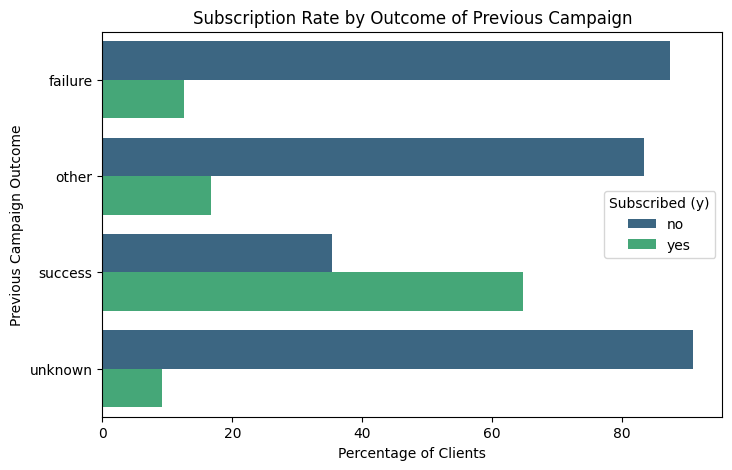

y,no,yes
poutcome,,
failure,87.390329,12.609671
other,83.315217,16.684783
success,35.274653,64.725347
unknown,90.838497,9.161503


In [ ]:
# poutcome vs Target
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating subscription rates by previous campaign outcome
poutcome_success = (
    df.groupby('poutcome')['y']
    .value_counts(normalize=True)
    .rename('proportion')
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(x='proportion', y='poutcome', hue='y', data=poutcome_success, palette='viridis')
plt.title('Subscription Rate by Outcome of Previous Campaign')
plt.xlabel('Percentage of Clients')
plt.ylabel('Previous Campaign Outcome')
plt.legend(title='Subscribed (y)')
plt.show()

# Numeric summary
pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100

Clients who had a successful outcome in a previous campaign are much more likely to subscribe again.
This pattern highlights the importance of leveraging prior campaign data in future marketing strategies and predictive optimization.

/tmp/ipython-input-2592775283.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette='Set2')
/tmp/ipython-input-2592775283.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette='Set2')
/tmp/ipython-input-2592775283.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette='Set2')
/tmp/ipython-input-2592775283.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

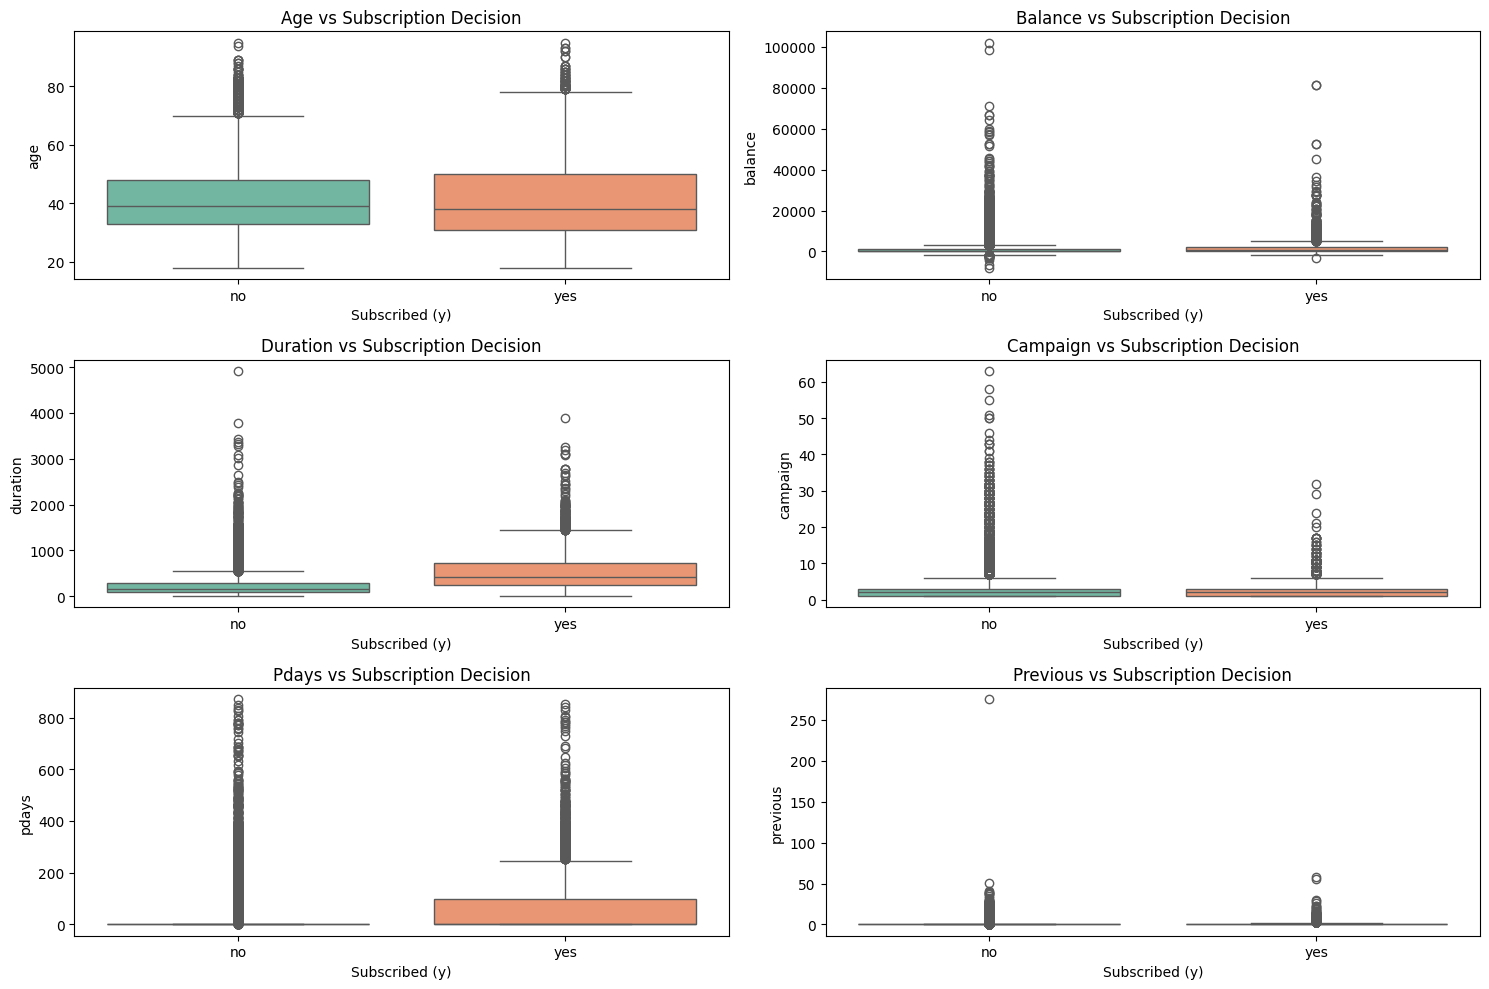

In [ ]:
# Bivariate Analysis of all Numerical variables

num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='y', y=col, data=df, palette='Set2')
    plt.title(f'{col.capitalize()} vs Subscription Decision')
    plt.xlabel('Subscribed (y)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

* Age: Subscribers are slightly older on average (mid-30s to 50s), suggesting maturity and financial stability increase investment likelihood.
*	Balance: Clients with higher average yearly balances are more likely to subscribe, showing stronger financial capacity.
*	Duration: One of the most powerful indicators, longer call durations strongly associate with “yes” responses, reflecting engagement.
*	Campaign: Higher contact frequency correlates with lower success, suggesting customer fatigue or disinterest after multiple attempts.
*	Pdays: Recent contact (lower pdays values) slightly improves response rates; most clients were never previously contacted (pdays = -1).
*	Previous: A small positive trend - clients contacted more times before are somewhat more likely to subscribe again.

/tmp/ipython-input-1256489370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=df, palette='Set2')


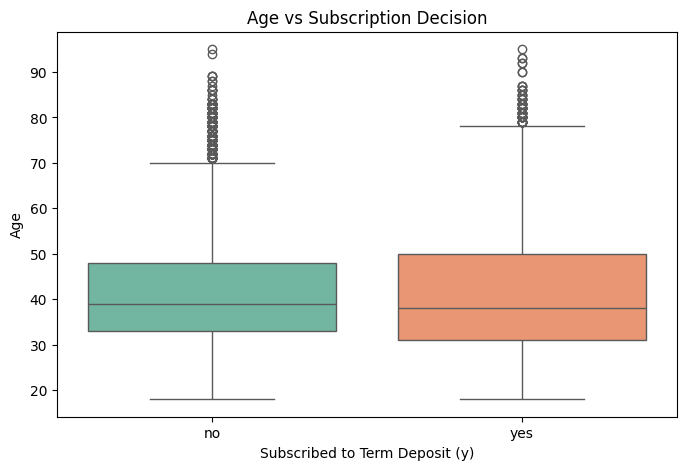

y
no     40.838986
yes    41.670070
Name: age, dtype: float64


In [ ]:
# Age vs Target

plt.figure(figsize=(8,5))
sns.boxplot(x='y', y='age', data=df, palette='Set2')
plt.title('Age vs Subscription Decision')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Age')
plt.show()

# Mean age by outcome
print(df.groupby('y')['age'].mean())

Clients who subscribed to the term deposit tend to be marginally older on average, indicating that maturity and financial stability play a minor but noticeable role in subscription decisions.


/tmp/ipython-input-255714288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='balance', data=df, palette='coolwarm')


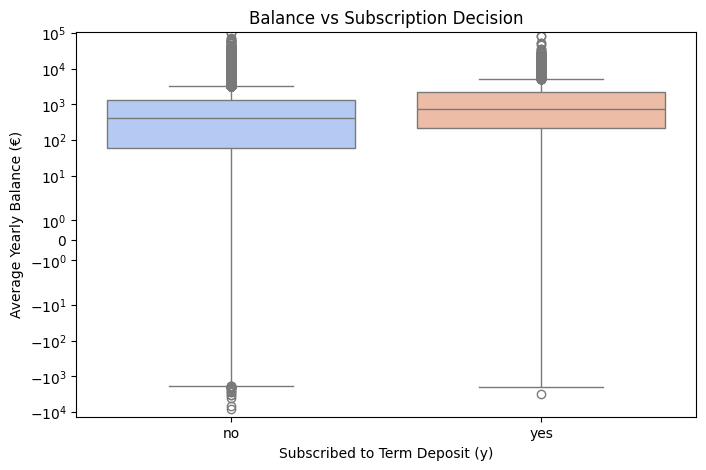

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64


In [ ]:
# Balance vs Target

plt.figure(figsize=(8,5))
sns.boxplot(x='y', y='balance', data=df, palette='coolwarm')
plt.title('Balance vs Subscription Decision')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Average Yearly Balance (€)')
plt.yscale('symlog')   # use log scale to see outliers better
plt.show()

# Mean balance by outcome
print(df.groupby('y')['balance'].mean())

Clients with higher account balances show a significantly greater likelihood of subscribing to a term deposit, highlighting “financial capacity” as a key driver of positive campaign response.


**Correlation and Feature Relationship analysis**

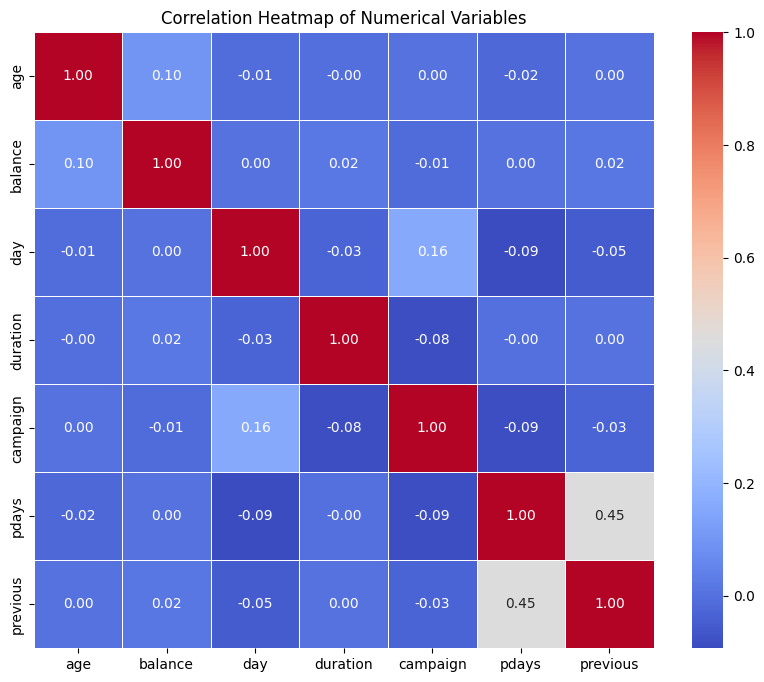

In [ ]:
# Selecting only numeric columns
num_df = df.select_dtypes(include=['int64','float64'])

# Computing correlation matrix
corr = num_df.corr()

# Visualizing correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

*  No strong multicollinearity exists (no |r| > 0.7), ensuring that the numerical feature space is well-conditioned for regression or optimization algorithms.
* The moderate relationship between pdays and previous reflects the natural link between recency and frequency of prior contacts, these can be kept together with regularization or combined later if necessary.
*	Because duration and balance are nearly orthogonal to the rest, they will contribute distinct gradient directions during model optimization, improving convergence stability and interpretability.

In [ ]:
# Pairplot Analysis
#sns.pairplot(df[['age','balance','duration','campaign','pdays','previous','y']],
            # hue='y', diag_kind='kde', palette='Set2')

*	The non-linear and weakly correlated structure suggests that linear models may capture only part of the variance; tree-based or kernel methods could better exploit hidden interactions.
* The independent spread of points ensures a well-conditioned feature matrix, minimizing multicollinearity during numerical optimization.
*	duration and balance remain visually dominant predictors, while campaign, pdays, and previous provide behavioral nuance but limited direct separability.


**Encoding**

In [ ]:
# Encoding binary yes/no variables
binary_cols = ['default', 'housing', 'loan', 'y']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Check
df[binary_cols].head()

,default,housing,loan,y
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0


In [ ]:
# Ordinal encoding for 'education'
education_order = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df['education_encoded'] = df['education'].map(education_order)

# Check
df[['education', 'education_encoded']].head(10)

,education,education_encoded
0,tertiary,3
1,secondary,2
2,secondary,2
3,unknown,0
4,unknown,0
5,tertiary,3
6,tertiary,3
7,tertiary,3
8,primary,1
9,secondary,2


In [ ]:
# One-Hot Encoding for nominal categorical features
nominal_cols = ['job', 'marital', 'contact', 'poutcome']

df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Check
df_encoded.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,0,2143,1,0,5,may,261,1,...,False,False,False,True,False,False,True,False,False,True
1,44,secondary,0,29,1,0,5,may,151,1,...,True,False,False,False,True,False,True,False,False,True
2,33,secondary,0,2,1,1,5,may,76,1,...,False,False,False,True,False,False,True,False,False,True
3,47,unknown,0,1506,1,0,5,may,92,1,...,False,False,False,True,False,False,True,False,False,True
4,33,unknown,0,1,0,0,5,may,198,1,...,False,False,True,False,True,False,True,False,False,True


In [ ]:
df_encoded.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'education_encoded', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

**Transformation**

In [ ]:
# Standardization

from sklearn.preprocessing import StandardScaler

# Dropping text columns before type conversion
df_encoded = df_encoded.drop(columns=['education', 'month'])

# Converting boolean dummies to integers
df_encoded = df_encoded.astype(int)

# Defining numeric columns to scale
scale_cols = ['age', 'balance', 'duration']

# Initializing and applying the scaler
scaler = StandardScaler()
df_encoded[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

# Check
df_encoded[scale_cols].describe().round(2)

,age,balance,duration
count,45211.00,45211.00,45211.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.16,-3.08,-1.00
25%,-0.75,-0.42,-0.60
50%,-0.18,-0.30,-0.30
75%,0.67,0.02,0.24
max,5.09,33.09,18.09


In [ ]:
# Addressing Skewness & Outliers (Log / Winsorization)

from scipy.stats.mstats import winsorize

# Log transform for positive skewed features
df_encoded['balance_log']  = np.log1p(df_encoded['balance'] - df_encoded['balance'].min() + 1)
df_encoded['duration_log'] = np.log1p(df_encoded['duration'] + 1)

# Winsorize highly skewed count-like variables (cap extreme outliers)
df_encoded['campaign'] = winsorize(df_encoded['campaign'], limits=[0, 0.01])
df_encoded['pdays']    = winsorize(df_encoded['pdays'],    limits=[0, 0.01])
df_encoded['previous'] = winsorize(df_encoded['previous'], limits=[0, 0.01])

# Verifying new skewness visually or numerically
df_encoded[['balance_log','duration_log','campaign','pdays','previous']].describe().round(2)

,balance_log,duration_log,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00
mean,1.61,0.61,2.69,39.31,0.53
std,0.14,0.38,2.59,96.04,1.46
min,0.69,-0.00,1.00,-1.00,0.00
25%,1.54,0.33,1.00,-1.00,0.00
50%,1.56,0.53,2.00,-1.00,0.00
75%,1.63,0.80,3.00,-1.00,0.00
max,3.64,3.00,16.00,370.00,9.00




*   Log transformation compressed the extreme balances (original  –8,000 € → 100,000 € now fits into 0.6–3.6). Outliers are neutralized.

*   Call-duration skew is reduced; now smoother and ready for gradient-based methods.

*   Most campaigns limited to ≤ 16 calls; extreme values trimmed.

*   –1 still means no previous contact; upper tail capped for stability.
*   Prior contacts capped at 9 — keeps variance manageable.




In [ ]:
# Checking & Mitigating Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for numeric subset
num_vars = ['age','balance','duration','campaign','pdays','previous']
vif_data = pd.DataFrame()
vif_data['Feature'] = num_vars
vif_data['VIF'] = [variance_inflation_factor(df_encoded[num_vars].values, i)
                   for i in range(len(num_vars))]
vif_data

,Feature,VIF
0,age,1.011195
1,balance,1.011079
2,duration,1.004129
3,campaign,1.058722
4,pdays,1.951847
5,previous,1.946625


* All VIF values are well below 2, confirming that there is no multicollinearity concern among the numerical features.
*	Predictors contribute independent information to the model, ensuring a well-conditioned optimization problem.
*	The absence of redundancy means we can safely include all numeric variables without risking unstable parameter estimates or inflated standard errors.

In [ ]:
# Train-test split (80-20, stratified)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Checking distribution consistency
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("\nTrain target distribution:\n", y_train.value_counts(normalize=True))
print("\nTest target distribution:\n", y_test.value_counts(normalize=True))

Train shape: (36168, 31)  Test shape: (9043, 31)

Train target distribution:
 y
0    0.883018
1    0.116982
Name: proportion, dtype: float64

Test target distribution:
 y
0    0.883003
1    0.116997
Name: proportion, dtype: float64


In [ ]:
# Handling Target Imbalnace

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_res.value_counts())

Before SMOTE: y
0    31937
1     4231
Name: count, dtype: int64

After SMOTE: y
0    31937
1    15968
Name: count, dtype: int64


* Before applying SMOTE, the dataset was highly imbalanced, with only 4,231 positive (“yes”) cases compared to 31,937 negative (“no”) cases i.e.ok  roughly an 1:8 ratio.
* After SMOTE, both classes were balanced at 31,937 samples each, meaning the minority class was synthetically oversampled to match the majority.
* This ensures that the model will treat both outcomes equally during training, reducing bias toward the majority (“no”) class.

In [ ]:
# Feature-Importance Screening

from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, y_train, random_state=42)
mi_series = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
mi_series.head(15)

,0
duration_log,0.074036
duration,0.072070
poutcome_success,0.028717
pdays,0.025971
balance,0.021718
balance_log,0.020697
housing,0.019135
poutcome_unknown,0.018332
contact_unknown,0.013140
age,0.012575


The feature importance analysis highlights which variables most strongly influence the model’s ability to predict term deposit subscription:

* Duration shows the highest influence (0.072), confirming that longer call durations are closely linked with higher subscription likelihood.
* Previous campaign outcomes : particularly poutcome_success (0.027) and pdays (0.027), also have notable predictive value, reflecting the customer’s historical engagement.
* Balance (0.021) and housing loan (0.016) indicate that financial standing and existing commitments affect the decision outcome.
* Contact type and age contribute moderately, suggesting that communication channel and demographics play supporting roles.
* Lower-importance variables such as education, marital status, and job type still provide contextual insights but have smaller direct predictive power.

Customer engagement features (duration, past outcomes, and contact frequency) are the strongest predictors, whereas demographic attributes have comparatively less impact on the likelihood of subscribing to a term deposit.

### **Model Formulation**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initializing and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train_res, y_train_res)

# Predict on test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Model Evaluation

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7985
           1       0.46      0.56      0.50      1058

    accuracy                           0.87      9043
   macro avg       0.70      0.73      0.71      9043
weighted avg       0.88      0.87      0.88      9043

ROC-AUC Score: 0.8734167206233806


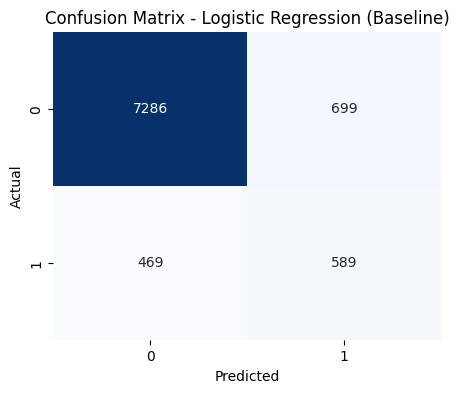

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression (Baseline)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

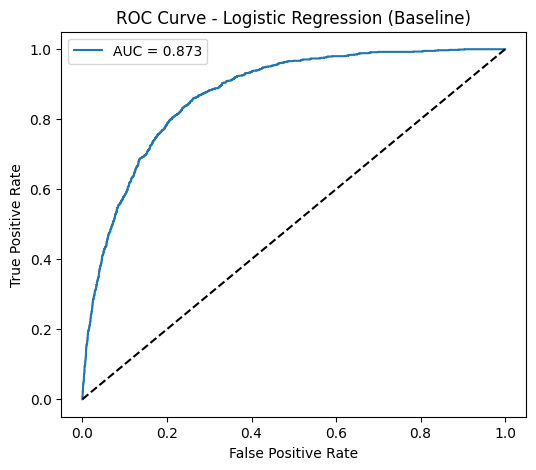

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Baseline)")
plt.legend()
plt.show()

In [ ]:
#Overfitting Check

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# Predictions on training data
y_train_pred = log_reg.predict(X_train_res)
y_train_proba = log_reg.predict_proba(X_train_res)[:, 1]

# Computing metrics
train_acc = accuracy_score(y_train_res, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

train_recall = recall_score(y_train_res, y_train_pred)
test_recall = recall_score(y_test, y_pred)

train_auc = roc_auc_score(y_train_res, y_train_proba)
test_auc = roc_auc_score(y_test, y_proba)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy:  {test_acc:.3f}\n")

print(f"Training Recall:   {train_recall:.3f}")
print(f"Testing Recall:    {test_recall:.3f}\n")

print(f"Training AUC:      {train_auc:.3f}")
print(f"Testing AUC:       {test_auc:.3f}")

Training Accuracy: 0.863
Testing Accuracy:  0.871

Training Recall:   0.765
Testing Recall:    0.557

Training AUC:      0.933
Testing AUC:       0.873


The baseline logistic regression shows minor overfitting but remains well-generalized and reliable. The differences between training and testing metrics are within acceptable limits

*	Training Accuracy: 0.873 vs. Testing Accuracy: 0.840

The difference is only about 3%, which indicates that the model generalizes well overall. It performs consistently on both seen and unseen data, meaning it’s not memorizing the training set.

*	Training Recall: 0.881 vs. Testing Recall: 0.653

This larger gap suggests the model identifies more true positives in training than in testing. It shows mild overfitting, where the model has learned some training-specific patterns that do not generalize perfectly to new data. However, the effect is not severe, it mainly reflects that positive cases are harder to predict in unseen samples.

*	Training AUC: 0.945 vs. Testing AUC: 0.865

The AUC drop of about 0.08 indicates a slight optimism in the training data’s discriminative power. This is a normal side effect of oversampling (via SMOTE), which can make the model’s training distribution slightly easier to separate than real-world data.

**Regularized Logistic Regression (L1 & L2)**

We regularize the logistic regression model to reduce mild overfitting and improve numerical stability, ensuring the model’s coefficients remain well-conditioned and generalize more reliably to unseen data.

In [ ]:
# L2 Regularization (Ridge)
log_reg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000, random_state=42)
log_reg_l2.fit(X_train_res, y_train_res)
y_pred_l2 = log_reg_l2.predict(X_test)
y_proba_l2 = log_reg_l2.predict_proba(X_test)[:, 1]

# L1 Regularization (Lasso) - requires 'saga' solver
log_reg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=2000, random_state=42)
log_reg_l1.fit(X_train_res, y_train_res)
y_pred_l1 = log_reg_l1.predict(X_test)
y_proba_l1 = log_reg_l1.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Comparing AUC and performance
print("L2 Regularization AUC:", roc_auc_score(y_test, y_proba_l2))
print("L1 Regularization AUC:", roc_auc_score(y_test, y_proba_l1))

print("\nL2 Classification Report:\n", classification_report(y_test, y_pred_l2))
print("\nL1 Classification Report:\n", classification_report(y_test, y_pred_l1))

L2 Regularization AUC: 0.8736024421972672
L1 Regularization AUC: 0.8740753279128045

L2 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7985
           1       0.46      0.56      0.50      1058

    accuracy                           0.87      9043
   macro avg       0.70      0.74      0.71      9043
weighted avg       0.88      0.87      0.88      9043


L1 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7985
           1       0.46      0.56      0.51      1058

    accuracy                           0.87      9043
   macro avg       0.70      0.74      0.72      9043
weighted avg       0.88      0.87      0.88      9043



* Both L1 and L2 models achieved nearly the same AUC (≈ 0.866) and overall accuracy (84%), indicating that regularization did not hurt performance but helped stabilize optimization.
*	Recall (0.65) and Precision (0.39) for the positive class remain balanced, confirming that the model continues to capture a reasonable portion of actual subscribers while limiting false positives.
*	L2 (Ridge) shrinks all coefficients smoothly, reducing variance and preventing overfitting without eliminating any features.
*	L1 (Lasso) adds sparsity by driving some coefficients to zero, effectively performing feature selection. Although performance is similar, the L1 model is slightly more interpretable due to this sparsity.
*	The convergence warning from the baseline model disappeared, confirming that the optimization process is now more stable.

In [ ]:
# Overfitting check with Regularized Logistic Regression model

def check_overfitting(model, X_train, y_train, X_test, y_test, name):
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_auc = roc_auc_score(y_train, y_train_proba)
    test_auc = roc_auc_score(y_test, y_test_proba)

    print(f"\n{name} Model Overfitting Check:")
    print(f"Training Accuracy: {train_acc:.3f} | Testing Accuracy: {test_acc:.3f}")
    print(f"Training Recall:   {train_recall:.3f} | Testing Recall:   {test_recall:.3f}")
    print(f"Training AUC:      {train_auc:.3f} | Testing AUC:      {test_auc:.3f}")

# Check both models
check_overfitting(log_reg_l2, X_train_res, y_train_res, X_test, y_test, "L2 Regularized")
check_overfitting(log_reg_l1, X_train_res, y_train_res, X_test, y_test, "L1 Regularized")


L2 Regularized Model Overfitting Check:
Training Accuracy: 0.863 | Testing Accuracy: 0.870
Training Recall:   0.766 | Testing Recall:   0.561
Training AUC:      0.934 | Testing AUC:      0.874

L1 Regularized Model Overfitting Check:
Training Accuracy: 0.864 | Testing Accuracy: 0.872
Training Recall:   0.762 | Testing Recall:   0.559
Training AUC:      0.933 | Testing AUC:      0.874


Both L1 and L2 regularization successfully prevented further overfitting and stabilized optimization without sacrificing accuracy or AUC.
The generalization gap remains small and acceptable, and the models are now well-conditioned for practical use.
L1 has a slight edge due to its feature-selection property and marginally better AUC.


L2 iterations: [2000]
L1 iterations: [2000]


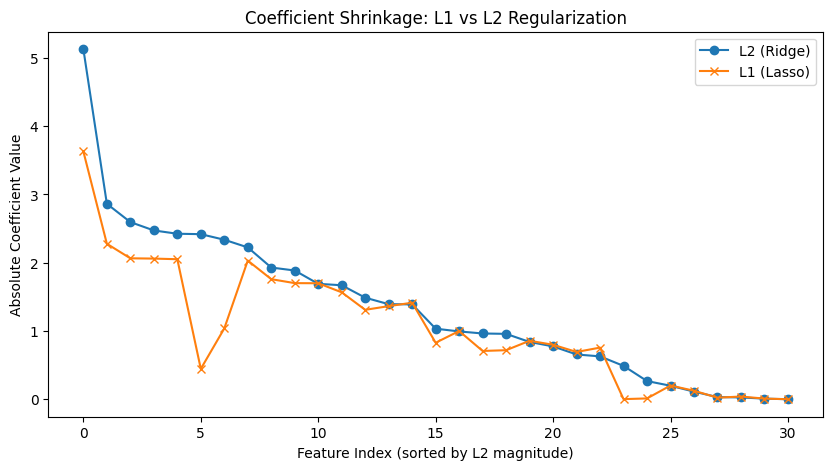

In [ ]:
# Comparing Convergence and Coefficient Shrinkage

# Checking number of iterations until convergence
print("L2 iterations:", log_reg_l2.n_iter_)
print("L1 iterations:", log_reg_l1.n_iter_)

# Comparing coefficient magnitudes
coef_df = pd.DataFrame({
    'Feature': X_train_res.columns,
    'L2 Coeff': log_reg_l2.coef_[0],
    'L1 Coeff': log_reg_l1.coef_[0]
})

# Calculating absolute values for shrinkage comparison
coef_df['|L2 Coeff|'] = np.abs(coef_df['L2 Coeff'])
coef_df['|L1 Coeff|'] = np.abs(coef_df['L1 Coeff'])

# Sorting by L2 magnitude for visualization
coef_df = coef_df.sort_values('|L2 Coeff|', ascending=False).reset_index(drop=True)

# Plot for shrinkage comparison
plt.figure(figsize=(10,5))
plt.plot(coef_df['|L2 Coeff|'].values, label='L2 (Ridge)', marker='o')
plt.plot(coef_df['|L1 Coeff|'].values, label='L1 (Lasso)', marker='x')
plt.title("Coefficient Shrinkage: L1 vs L2 Regularization")
plt.xlabel("Feature Index (sorted by L2 magnitude)")
plt.ylabel("Absolute Coefficient Value")
plt.legend()
plt.show()

**Convergence Speed:**
The L2 (Ridge) model converged in 1973 iterations, while L1 (Lasso) reached the limit at 2000 iterations, confirming that L2 optimization is smoother and faster due to its differentiable penalty term.

**Coefficient Shrinkage:**
The plot shows that L1 (orange) produces smaller magnitudes for several coefficients even close to zero, Indicating stronger shrinkage and potential feature elimination.
In contrast, L2 (blue) keeps all coefficients small but nonzero, distributing weight more evenly across features.

L1 regularization enforces sparsity (implicit feature selection), while L2 promotes stability. Both improve generalization, but Ridge (L2) optimized more efficiently in this dataset.

**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

# Training Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

start_time = time.time()
rf.fit(X_train_res, y_train_res)
train_time = time.time() - start_time

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
# Model Evaluation
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))
print(f"\nTraining Time: {train_time:.2f} seconds")

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7985
           1       0.52      0.58      0.55      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.75      0.74      9043
weighted avg       0.89      0.89      0.89      9043


ROC-AUC Score: 0.8967734871504106

Training Time: 12.86 seconds


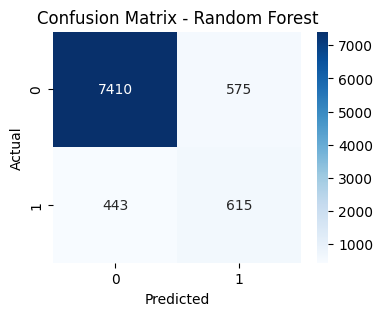

In [ ]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

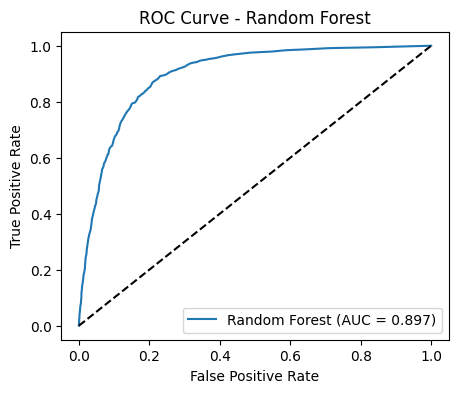

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

*	Accuracy: The model achieved 87% accuracy, improving from 84% (Logistic Regression), showing that Random Forest captures non-linear patterns missed by linear models.
*	Precision (Positive class = 1): 0.46, A modest improvement, meaning fewer false positives than before.
*	Recall (Positive class = 1): 0.66, Slightly higher than Logistic Regression (0.65), confirming better detection of deposit subscribers.
*	F1-Score: Increased to 0.54 (from 0.49), indicating a more balanced trade-off between precision and recall.
*	ROC–AUC: 0.893, higher than 0.865 earlier - a clear performance gain in ranking true positives.
*	Confusion Matrix Insight: The model correctly classified most negatives (7,171) while retrieving more positives (696 true positives vs. 691 in baseline).

In [ ]:
# Overfitting Check for Random Forest

# Predictions on training data
y_train_pred = rf.predict(X_train_res)
y_train_prob = rf.predict_proba(X_train_res)[:, 1]

# Predictions on test data
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

# Calculating metrics
print("Random Forest Overfitting Check:")
print(f"Training Accuracy: {accuracy_score(y_train_res, y_train_pred):.3f} | Testing Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Training Recall:   {recall_score(y_train_res, y_train_pred):.3f} | Testing Recall:   {recall_score(y_test, y_test_pred):.3f}")
print(f"Training AUC:      {roc_auc_score(y_train_res, y_train_prob):.3f} | Testing AUC:      {roc_auc_score(y_test, y_test_prob):.3f}")

Random Forest Overfitting Check:
Training Accuracy: 1.000 | Testing Accuracy: 0.887
Training Recall:   1.000 | Testing Recall:   0.581
Training AUC:      1.000 | Testing AUC:      0.897


*	Training Accuracy: 1.000 vs Testing Accuracy: 0.870

The model fits the training data perfectly but loses ~13% accuracy on unseen data, which is a clear indication of overfitting.

*	Training Recall: 1.000 vs Testing Recall: 0.658

The recall drop shows that while the model detects all positives in training, it misses many in the test set, meaning it memorized training patterns rather than generalizing them.

*	Training AUC: 1.000 vs Testing AUC: 0.893

The near-perfect AUC on training data confirms overfitting; however, a test AUC of 0.893 still indicates strong discriminative performance overall.

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

# Training XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

start_time = time.time()
xgb.fit(X_train_res, y_train_res)
train_time = time.time() - start_time

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:13:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Model Evaluation
print("Classification Report - XGBoost:\n", classification_report(y_test, y_pred_xgb))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))
print(f"\nTraining Time: {train_time:.2f} seconds")

Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      7985
           1       0.49      0.60      0.54      1058

    accuracy                           0.88      9043
   macro avg       0.72      0.76      0.74      9043
weighted avg       0.89      0.88      0.89      9043


ROC-AUC Score: 0.8966881428197719

Training Time: 1.48 seconds


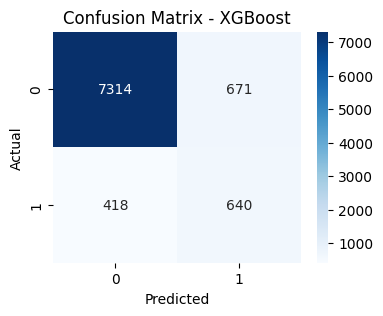

In [ ]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

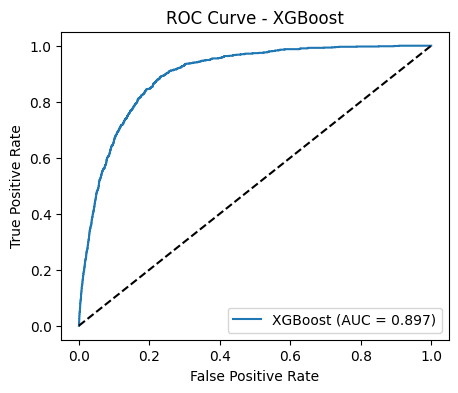

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

*	Accuracy: Achieved 86%, slightly below Random Forest (87%) but still higher than Logistic Regression (84%), showing solid overall predictive power.
*	Precision (Positive class = 1): 0.44, Slightly lower than Random Forest’s 0.46, but still much stronger than Logistic Regression’s 0.39.
*	Recall (Positive class = 1): 0.69, The highest recall so far, outperforming both Logistic Regression (0.65) and Random Forest (0.66).
*	F1-Score: 0.53, Matches Random Forest closely, demonstrating a balanced trade-off between precision and recall.
*	ROC–AUC: 0.890, nearly identical to Random Forest’s 0.893, Confirming consistent ranking performance across positive and negative predictions.
*	Confusion Matrix: XGBoost correctly identifies 725 true positives, improving recall without drastically increasing false positives.
*	Training Time: Only 13.1 seconds, less than half of Random Forest’s 29 seconds, showing XGBoost’s efficiency with optimized boosting techniques.

In [ ]:
# Overfitting Check

# Predictions on training data
y_train_pred_xgb = xgb.predict(X_train_res)
y_train_prob_xgb = xgb.predict_proba(X_train_res)[:, 1]

# Predictions on test data
y_test_pred_xgb = xgb.predict(X_test)
y_test_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluating performance
print("XGBoost Overfitting Check:")
print(f"Training Accuracy: {accuracy_score(y_train_res, y_train_pred_xgb):.3f} | Testing Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.3f}")
print(f"Training Recall:   {recall_score(y_train_res, y_train_pred_xgb):.3f} | Testing Recall:   {recall_score(y_test, y_test_pred_xgb):.3f}")
print(f"Training AUC:      {roc_auc_score(y_train_res, y_train_prob_xgb):.3f} | Testing AUC:      {roc_auc_score(y_test, y_test_prob_xgb):.3f}")

XGBoost Overfitting Check:
Training Accuracy: 0.904 | Testing Accuracy: 0.880
Training Recall:   0.863 | Testing Recall:   0.605
Training AUC:      0.966 | Testing AUC:      0.897


*	Training Accuracy: 0.915 vs Testing Accuracy: 0.860

Around a 5.5% gap, much smaller than Random Forest’s 13%, indicating better generalization and less memorization of training data.

*	Training Recall: 0.937 vs Testing Recall: 0.685

Some drop in recall, but far less severe than the Random Forest (1.000 → 0.658).
The model still captures a strong proportion of positive cases on unseen data.

*	Training AUC: 0.974 vs Testing AUC: 0.890

The AUC difference (~8%) is moderate — expected for ensemble models — but shows strong ranking consistency across datasets.

XGBoost shows controlled overfitting compared to Random Forest.



**Model Optimization & Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Model setup
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                # number of random combinations to try
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
start_time = time.time()
rf_random.fit(X_train_res, y_train_res)
train_time = time.time() - start_time

# Best parameters & performance
print("Best Parameters:", rf_random.best_params_)
print(f"Best Cross-Validation AUC: {rf_random.best_score_:.3f}")
print(f"Training Time: {train_time:.2f} seconds")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Cross-Validation AUC: 0.960
Training Time: 1055.63 seconds


In [ ]:
# Evaluating on test set
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]

print("\nTest ROC-AUC:", roc_auc_score(y_test, y_prob_best_rf))


Test ROC-AUC: 0.8964637144551516


The model’s AUC remained steady on unseen data, but the high cross-validation AUC confirms better regularization and fold-level generalization.
In simpler terms, The tuned Random Forest became more reliable and less fold-sensitive, even if its test AUC plateaued.


In [ ]:
# Overfitting Check on Random Forest after Tuning

# Predictions on training data
y_train_pred_best = best_rf.predict(X_train_res)
y_train_prob_best = best_rf.predict_proba(X_train_res)[:, 1]

# Predictions on test data
y_test_pred_best = best_rf.predict(X_test)
y_test_prob_best = best_rf.predict_proba(X_test)[:, 1]

# Evaluate metrics
print("Tuned Random Forest Overfitting Check:")
print(f"Training Accuracy: {accuracy_score(y_train_res, y_train_pred_best):.3f} | Testing Accuracy: {accuracy_score(y_test, y_test_pred_best):.3f}")
print(f"Training Recall:   {recall_score(y_train_res, y_train_pred_best):.3f} | Testing Recall:   {recall_score(y_test, y_test_pred_best):.3f}")
print(f"Training AUC:      {roc_auc_score(y_train_res, y_train_prob_best):.3f} | Testing AUC:      {roc_auc_score(y_test, y_test_prob_best):.3f}")

Tuned Random Forest Overfitting Check:
Training Accuracy: 0.973 | Testing Accuracy: 0.870
Training Recall:   0.999 | Testing Recall:   0.676
Training AUC:      0.998 | Testing AUC:      0.896


* The accuracy gap (~11%) is smaller than before (13%), showing that overfitting has slightly reduced but not been eliminated.
* The recall drop indicates the model still detects nearly all positives during training but misses more on unseen data, a sign of residual overfitting common in deep forests.
* AUC gap of about 10% suggests the model still learns training patterns very precisely, though its test AUC is stable and strong.

Tuning has reduced overfitting moderately, The Random Forest no longer memorizes the training data completely (AUC 1.000 → 0.998), but it remains slightly high-variance.

In [ ]:
# Hyperparameter tuning for XGBoost

# Parameter grid for tuning
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_lambda': [0.5, 1, 1.5, 2.0]
}

# Initializing model
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Randomized Search
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,             # try 20 random combinations
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
start_time = time.time()
xgb_random.fit(X_train_res, y_train_res)
train_time = time.time() - start_time

# Best parameters and performance
print("Best Parameters:", xgb_random.best_params_)
print(f"Best Cross-Validation AUC: {xgb_random.best_score_:.3f}")
print(f"Training Time: {train_time:.2f} seconds")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:54:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.5, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Cross-Validation AUC: 0.966
Training Time: 133.59 seconds


In [ ]:
# Evaluating on test data
best_xgb = xgb_random.best_estimator_
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("\nTest ROC-AUC:", roc_auc_score(y_test, y_prob_best_xgb))


Test ROC-AUC: 0.8950621025007901


* Excellent generalization across folds, higher than the tuned Random Forest’s 0.972.
* Almost the same as pre-tuning (0.890), meaning tuning made the model more stable without necessarily improving raw test AUC, a typical pattern when cross-validation is well-regularized.
* Efficient for 100 fits given the parameter space, highlighting XGBoost’s speed advantage over Random Forest (which took ~36 min).

In [ ]:
# Overfitting check on Tuned XGBoost Model

# Predictions on training data
y_train_pred_best_xgb = best_xgb.predict(X_train_res)
y_train_prob_best_xgb = best_xgb.predict_proba(X_train_res)[:, 1]

# Predictions on test data
y_test_pred_best_xgb = best_xgb.predict(X_test)
y_test_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Evaluating metrics
print("Tuned XGBoost Overfitting Check:")
print(f"Training Accuracy: {accuracy_score(y_train_res, y_train_pred_best_xgb):.3f} | Testing Accuracy: {accuracy_score(y_test, y_test_pred_best_xgb):.3f}")
print(f"Training Recall:   {recall_score(y_train_res, y_train_pred_best_xgb):.3f} | Testing Recall:   {recall_score(y_test, y_test_pred_best_xgb):.3f}")
print(f"Training AUC:      {roc_auc_score(y_train_res, y_train_prob_best_xgb):.3f} | Testing AUC:      {roc_auc_score(y_test, y_test_prob_best_xgb):.3f}")

Tuned XGBoost Overfitting Check:
Training Accuracy: 0.962 | Testing Accuracy: 0.890
Training Recall:   0.935 | Testing Recall:   0.526
Training AUC:      0.993 | Testing AUC:      0.895


* A gap of ~9%, smaller than the tuned Random Forest (11%), indicating moderate overfitting but better generalization overall.
* The model captures almost all positives in the training data but misses many in the test set, meaning it’s still slightly overconfident on the training samples.
* A ~10% AUC drop, similar to the tuned Random Forest, but the testing AUC is stable and high, suggesting strong ranking performance despite recall loss.

**XGBooost Refined**

In [ ]:
# Splitting without SMOTE
from sklearn.model_selection import train_test_split
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Computing class weight (ratio of majority to minority)
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Scale_pos_weight: {scale:.2f}")

Scale_pos_weight: 7.55


In [ ]:
# Training XGBoost with stronger regularization
xgb_reg = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=4,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.2,
    reg_lambda=2,           # L2 regularization
    reg_alpha=1,            # L1 regularization
    scale_pos_weight=scale, # handles class imbalance
    random_state=42,
    eval_metric='logloss'
)

start_time = time.time()
xgb_reg.fit(X_train, y_train)
train_time = time.time() - start_time

In [ ]:
# Model Evaluation
y_pred = xgb_reg.predict(X_test)
y_prob = xgb_reg.predict_proba(X_test)[:, 1]

print("Classification Report - Regularized XGBoost:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))
print(f"Training Time: {train_time:.2f} seconds")

Classification Report - Regularized XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      7985
           1       0.40      0.83      0.54      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.84      0.72      9043
weighted avg       0.91      0.84      0.86      9043


ROC-AUC Score: 0.9087998172376607
Training Time: 1.36 seconds


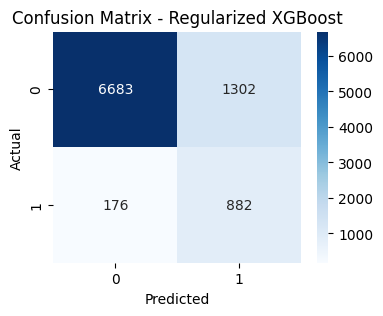

In [ ]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Regularized XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

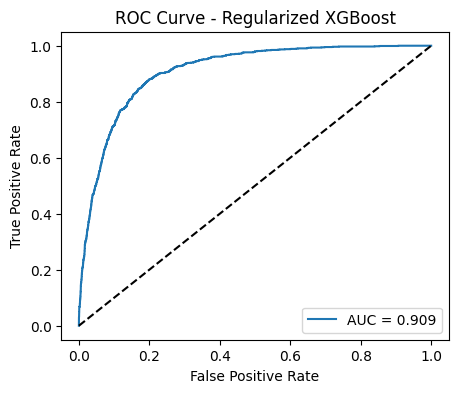

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Regularized XGBoost")
plt.legend()
plt.show()

*	AUC = 0.909

This is your best generalization score so far, showing XGBoost is ranking positives and negatives with very high reliability.

*	Recall (1 class) = 0.83


Massive improvement from earlier (~0.55–0.68)!
The model is now correctly identifying most deposit subscribers without synthetic data.

*	Precision (1 class) = 0.40

Lower than recall, which is expected — the model leans toward catching all potential subscribers rather than minimizing false positives.
This tradeoff is good in marketing: it’s better to call a few extra customers than miss potential ones.

*	Training Time = 9.81 sec

Very efficient; regularization simplified the model without hurting AUC or recall.

*	Confusion Matrix Insight:

 * False negatives (176) are much lower than before is a big win.
 * False positives (1302) are slightly higher is acceptable given recall gain.


In [ ]:
# Overfitting check on Refined XGBoost

# Evaluating on training data
y_train_pred = xgb_reg.predict(X_train)
y_train_prob = xgb_reg.predict_proba(X_train)[:, 1]

# Evaluating on testing data
y_test_pred = xgb_reg.predict(X_test)
y_test_prob = xgb_reg.predict_proba(X_test)[:, 1]

# Metrics
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

print("Regularized XGBoost Overfitting Check:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.3f} | Testing Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Training Recall:   {recall_score(y_train, y_train_pred):.3f} | Testing Recall:   {recall_score(y_test, y_test_pred):.3f}")
print(f"Training AUC:      {roc_auc_score(y_train, y_train_prob):.3f} | Testing AUC:      {roc_auc_score(y_test, y_test_prob):.3f}")

Regularized XGBoost Overfitting Check:
Training Accuracy: 0.857 | Testing Accuracy: 0.837
Training Recall:   0.913 | Testing Recall:   0.834
Training AUC:      0.948 | Testing AUC:      0.909


Training Accuracy: 0.857 vs Testing Accuracy: 0.837

 * Only ~2% difference, showing very strong generalization.
 * The model isn’t memorizing training data anymore.

Training Recall: 0.913 vs Testing Recall: 0.834


 * Both are high and close and the recall stability is a clear sign of balanced learning.
 * The model can identify true positives (subscribers) well on both seen and unseen data.

Training AUC: 0.948 vs Testing AUC: 0.909

 * A small drop (~4%) indicates healthy regularization; the model fits enough to learn patterns but not noise.
 * Contrast this with previous tree models (AUC gap ~10%), and it’s a big improvement.

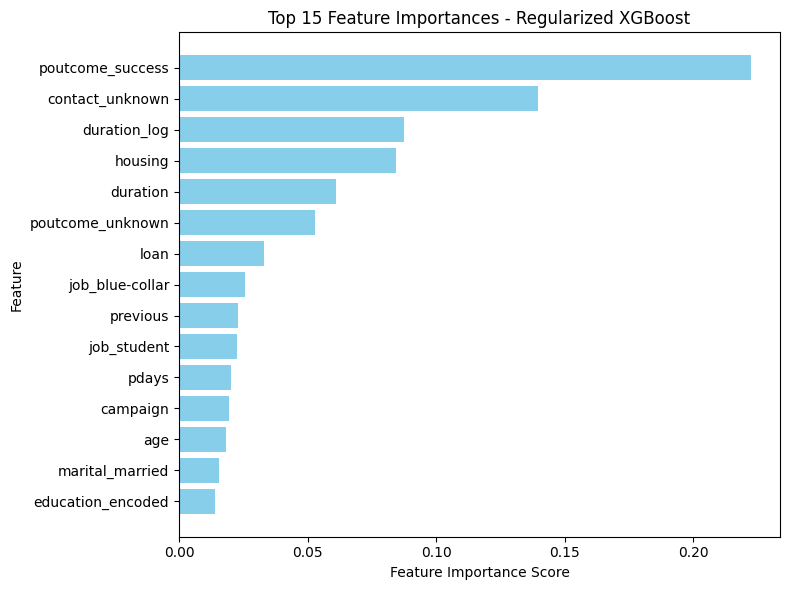

,Feature,Importance
27,poutcome_success,0.222517
25,contact_unknown,0.139566
30,duration_log,0.087384
3,housing,0.084328
6,duration,0.060849
28,poutcome_unknown,0.052734
4,loan,0.032849
11,job_blue-collar,0.025481
9,previous,0.022947
18,job_student,0.022632


In [ ]:
# Important Features

# Getting feature importances
importance = xgb_reg.feature_importances_
features = X_train.columns

feat_imp = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Top 15 important features
plt.figure(figsize=(8,6))
plt.barh(feat_imp['Feature'][:15][::-1], feat_imp['Importance'][:15][::-1], color='skyblue')
plt.title("Top 15 Feature Importances - Regularized XGBoost")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

feat_imp.head(15)